# **Exercise 1: Backward search for variable selection with AIC metric**
Using Bank marketing dataset predict whether a customer shall subscribe to a term deposit in this binary classification task.

In [ ]:
import numpy as np #library numpy
import pandas as pd #library pandas
from matplotlib import pyplot as plt #library matplot
from mpl_toolkits.mplot3d import Axes3D #for 3D plot
from IPython.display import display, Image, Math #to enable mathematical representation
from numpy.random import seed, rand, randn #seed and random from numpy library
import math
seed(seed=3116)

In [ ]:
#Bank Data has been read and investigated
bank = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/bank.csv', engine='python', sep=";", decimal=",")

### *Convert any non-numeric values to numeric values with hot-one encoding*

In [ ]:
categorical_features = ['marital', 'job', 'education', 'contact', 'poutcome']
print("Size before encoding:", bank.shape)
dataset1 = pd.get_dummies( bank, columns = categorical_features)
print("Size after encoding:",dataset1.shape)
dataset1.head()

Size before encoding: (4521, 17)
Size after encoding: (4521, 38)


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,no,1787,no,no,19,oct,79,1,-1,...,0,0,0,1,0,0,0,0,0,1
1,33,no,4789,yes,yes,11,may,220,1,339,...,1,0,0,1,0,0,1,0,0,0
2,35,no,1350,yes,no,16,apr,185,1,330,...,0,1,0,1,0,0,1,0,0,0
3,30,no,1476,yes,yes,3,jun,199,4,-1,...,0,1,0,0,0,1,0,0,0,1
4,59,no,0,yes,no,5,may,226,1,-1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
#converting the month to number
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov','dec']

month_num = [months.index(i) for i in dataset1.month]

In [ ]:
dataset1.month = month_num
dataset1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,no,1787,no,no,19,9,79,1,-1,...,0,0,0,1,0,0,0,0,0,1
1,33,no,4789,yes,yes,11,4,220,1,339,...,1,0,0,1,0,0,1,0,0,0
2,35,no,1350,yes,no,16,3,185,1,330,...,0,1,0,1,0,0,1,0,0,0
3,30,no,1476,yes,yes,3,5,199,4,-1,...,0,1,0,0,0,1,0,0,0,1
4,59,no,0,yes,no,5,4,226,1,-1,...,1,0,0,0,0,1,0,0,0,1


### *Bank Data response variable converted to binary*

In [ ]:
dataset1['y'] = dataset1['y'].map({'yes': 1, 'no': 0})
dataset1['housing'] = dataset1['housing'].map({'yes': 1, 'no': 0})
dataset1['loan'] = dataset1['loan'].map({'yes': 1, 'no': 0})
dataset1['default'] = dataset1['default'].map({'yes': 1, 'no': 0})

### *Normalize (Standardize) the data*

In [ ]:
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
norm_bank_onehot=dataset1.apply(lambda x: normalize(x), axis=0)

### *Split the data into a train/test splits according to the ratios 80%:20%.*

In [ ]:
#Train and test functions to split data
def train(data,ratio):
    n = len(data)
    k=math.ceil((ratio)*n)
    train = data.iloc[:k,:]
    return train

In [ ]:
def test(data,ratio):
    n = len(data)
    k=math.ceil((ratio)*n)
    test = data.iloc[k:n,:]
    return test

In [ ]:
train_bank = train(norm_bank_onehot,0.8)
test_bank = test(norm_bank_onehot,0.8)
print('Train bank data dim:' ,train_bank.shape)
print('Test bank data dim:' ,test_bank.shape)

Train bank data dim: (3617, 38)
Test bank data dim: (904, 38)


In [ ]:
#Function to convert Independent Varibles into matrix form with \
#column of 1s are as the first column
def X_matrix(data):
    ind_data = data.iloc[:,:-1]
    X=ind_data.values
    XT=X.T
    X = np.vstack([np.ones(len(X)),XT]).T
    return X

#Response Varible converted into matrix form
def y_matrix(data):
    c = len(data.columns)
    ind_data = data.iloc[:,c-1:c]
    y=ind_data.values
    return y

In [ ]:
#Bank dataset converted into proper matrix format
x_Train = X_matrix(train_bank)
y_Train = y_matrix(train_bank)
x_Test = X_matrix(test_bank)
y_Test = y_matrix(test_bank)

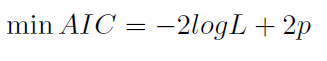

In [ ]:
#AIC metric
Image(filename = "AIC.PNG", width=300, height=100)

In [ ]:
def log_likelihood(x, y, beta):
    z = np.dot(x, beta)
    log = np.sum( y*z - np.log(1 + np.exp(z)) )
    return log

def AIC(x,y,beta,p):
    return -2*np.log(log_likelihood(x,y,beta))+2*p


## **Implement logistic regression and mini-batch Gradient Ascent**

In [ ]:
#we define minibatch function to get minibatches from x and y train

def minibatches(x, y, batch_size): 
    minibatches = [] 
    data = np.hstack((x, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        minibatch = data[i * batch_size:(i + 1)*batch_size, :] 
        x_mini = minibatch[:, :-1] 
        y_mini = minibatch[:, -1].reshape((-1, 1)) 
        minibatches.append((x_mini, y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        x_mini = mini_batch[:, :-1] 
        y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        minibatches.append((x_mini, y_mini)) 
    return minibatches 
        

print(minibatches(x_Train, y_Train, 50))

[(array([[1.        , 0.27941176, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.08823529, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.17647059, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.39705882, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36764706, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.60294118, 0.        , ..., 0.        , 0.        ,
        0.        ]]), array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
    

In [ ]:
# linear regression using "mini-batch" gradient ascent 
# function to compute hypothesis / predictions 

def hypothesis(x, beta): 
    return np.dot(x, beta) 

# function to compute gradient of error function w.r.t. theta   
def sigmoid (x, beta):
    
    z = np.dot(x, beta)
    y = np.exp(z.astype(np.float64))/(1.0+np.exp(z.astype(np.float64)))
    return y

In [ ]:
# function to compute gradient of error function w.r.t. theta 
def gradient(x, y, beta): 
    h = hypothesis(x, beta) 
    grad = np.dot(x.transpose(), (h - y)) 
    return grad 

def logistic_loss(x, y, beta):

    y_pred = sigmoid(x, beta)
    loss=  -(np.sum( np.log(y_pred[y==1,]))+ np.sum(np.log(1-y_pred[y==0,])))
    return loss



In [ ]:
def gradientAscent(x, y, learning_rate = 0.0000000001, batch_size = 50): 
    beta = np.zeros((x.shape[1], 1)) 
    error_list = [] 
    train_loss_list = []
    test_loss_list = []
    aic_list = []
    last_loss_train = 0
    max_iters = 200
    for itr in range(max_iters): 
        mini_batches = minibatches(x, y, batch_size) 
        for mini_batch in mini_batches: 
            x_mini, y_mini = mini_batch 
            beta = beta + learning_rate * gradient(x_mini, y_mini, beta) 
            #error_list.append(cost(x_mini, y_mini, beta)) 
            loss_train = logistic_loss(x, y, beta)
            loss_test = logistic_loss(x_Test, y_Test, beta)
            #aic_list = AIC(x_train,y_train,theta, len(x_train.T))

            #saving the loss in train and test
            train_loss_list.append(loss_train)
            test_loss_list.append(loss_test)

            if(np.abs(last_loss_train-loss_train)<0.000001):

                break

            last_loss_train = loss_train
  
    return beta, error_list,train_loss_list, test_loss_list

In [ ]:
beta, error_list,train_loss_list,test_loss_list = gradientAscent(x_Train, y_Train) 

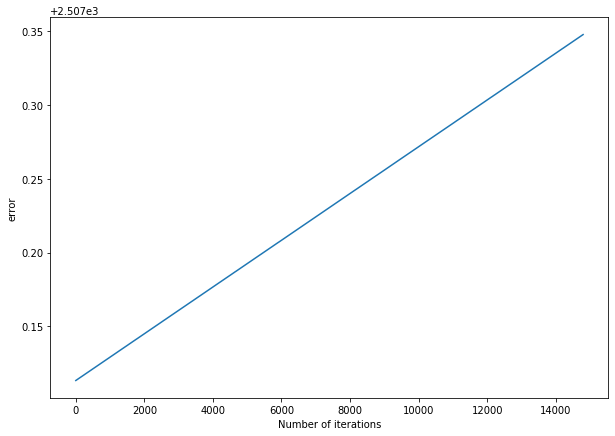

In [ ]:
plt.figure(figsize=(10,7))# visualising gradient descent 
plt.plot(train_loss_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("error") 
plt.show() 